# Distribution of Biomass Fraction and Rate Constants

The distribution of biomass fraction is closely related to the distribution of rate constants $a_1, ..., a_n$. However, their mathematical relationships are not necessarily straightforward nor insightful to compute in full, so we seek a more qualitatively description of this pehnomenon and try to quantify essential aspects.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from joblib import Parallel, delayed
import pandas as pd
import seaborn as sns
import time
from scipy.special import logsumexp

# Constants
a1, a2, a3, a4, a5, a6, a7, a8, a9 = 23.8, 5.6, 4.8, 4.4, 4.1, 3.8, 3.4, 2.7, 1.8
k1, k2, k3, k4, k5, k6, k7, k8, k9 = 0.1, 0.09, 0.07, 0.04, 0.01, 0.009, 0.006, 0.003, 0.002
N = 200     
b_min = 5e-4
b_max = 0.1
b_vals = np.logspace(np.log10(b_min), np.log10(b_max), N)

## 1. System with 10 partitions

In [ ]:
def softmax_partition_MM10(u):
    u1, u2, u3, u4, u5, u6, u7, u8, u9 = u
    logZ = logsumexp([u1, u2, u3, u4, u5, u6, u7, u8, u9, 0.0])
    theta1 = np.exp(u1 - logZ)
    theta2 = np.exp(u2 - logZ)
    theta3 = np.exp(u3 - logZ)
    theta4 = np.exp(u4 - logZ)
    theta5 = np.exp(u5 - logZ)
    theta6 = np.exp(u6 - logZ)
    theta7 = np.exp(u7 - logZ)
    theta8 = np.exp(u8 - logZ)
    theta9 = np.exp(u9 - logZ)
    theta10 = np.exp(-logZ)
    return theta1, theta2, theta3, theta4, theta5, theta6, theta7, theta8, theta9, theta10

# System with variable rate constants
def BioSystemMM10_variable(theta, a_vals, k_vals, b_val):
    term_Y1 = (a_vals[0] * theta[1]) / (b_val * theta[0]) + k_vals[0] - 1
    Y1 = (1/2) * (np.sqrt(term_Y1**2 + 4 * k_vals[0]) - term_Y1)
    term_Y2 = (a_vals[1] * theta[2]) / (b_val * theta[0]) + k_vals[1] - (1 - Y1)
    Y2 = (1/2) * (np.sqrt(term_Y2**2 + 4 * (1 - Y1) * k_vals[1]) - term_Y2)
    term_Y3 = (a_vals[2] * theta[3]) / (b_val * theta[0]) + k_vals[2] - (1 - Y1 - Y2)
    Y3 = (1/2) * (np.sqrt(term_Y3**2 + 4 * (1 - Y1 - Y2) * k_vals[2]) - term_Y3)
    term_Y4 = (a_vals[3] * theta[4]) / (b_val * theta[0]) + k_vals[3] - (1 - Y1 - Y2 - Y3)
    Y4 = (1/2) * (np.sqrt(term_Y4**2 + 4 * (1 - Y1 - Y2 - Y3) * k_vals[3]) - term_Y4)
    term_Y5 = (a_vals[4] * theta[5]) / (b_val * theta[0]) + k_vals[4] - (1 - Y1 - Y2 - Y3 - Y4)
    Y5 = (1/2) * (np.sqrt(term_Y5**2 + 4 * (1 - Y1 - Y2 - Y3 - Y4) * k_vals[4]) - term_Y5)
    term_Y6 = (a_vals[5] * theta[6]) / (b_val * theta[0]) + k_vals[5] - (1 - Y1 - Y2 - Y3 - Y4 - Y5)
    Y6 = (1/2) * (np.sqrt(term_Y6**2 + 4 * (1 - Y1 - Y2 - Y3 - Y4 - Y5) * k_vals[5]) - term_Y6)
    term_Y7 = (a_vals[6] * theta[7]) / (b_val * theta[0]) + k_vals[6] - (1 - Y1 - Y2 - Y3 - Y4 - Y5 - Y6)
    Y7 = (1/2) * (np.sqrt(term_Y7**2 + 4 * (1 - Y1 - Y2 - Y3 - Y4 - Y5 - Y6) * k_vals[6]) - term_Y7)
    term_Y8 = (a_vals[7] * theta[8]) / (b_val * theta[0]) + k_vals[7] - (1 - Y1 - Y2 - Y3 - Y4 - Y5 - Y6 - Y7)
    Y8 = (1/2) * (np.sqrt(term_Y8**2 + 4 * (1 - Y1 - Y2 - Y3 - Y4 - Y5 - Y6 - Y7) * k_vals[7]) - term_Y8)
    term_Y9 = (a_vals[8] * theta[9]) / (b_val * theta[0]) + k_vals[8] - (1 - Y1 - Y2 - Y3 - Y4 - Y5 - Y6 - Y7 - Y8)
    Y9 = (1/2) * (np.sqrt(term_Y9**2 + 4 * (1 - Y1 - Y2 - Y3 - Y4 - Y5 - Y6 - Y7 - Y8) * k_vals[8]) - term_Y9)
    Y10 = (a_vals[8] * theta[9] / b_val) * (Y9 / (k_vals[8] + Y9))
    Y11 = (theta[1] / theta[0]) * Y10
    Y12 = (theta[2] / theta[0]) * Y10
    Y13 = (theta[3] / theta[0]) * Y10
    Y14 = (theta[4] / theta[0]) * Y10
    Y15 = (theta[5] / theta[0]) * Y10
    Y16 = (theta[6] / theta[0]) * Y10
    Y17 = (theta[7] / theta[0]) * Y10
    Y18 = (theta[8] / theta[0]) * Y10
    Y19 = (theta[9] / theta[0]) * Y10
    lambda_val = b_val * Y10
    # r_denom = (k_vals[0] + Y1)/(a_vals[0]*Y11) + (k_vals[1]+Y2)/(a_vals[1]*Y12) + (k_vals[2]+Y3)/(a_vals[2]*Y13) + (k_vals[3]+Y4)/(a_vals[3]*Y14) + (k_vals[4]+Y5)/(a_vals[4]*Y15) + (k_vals[5]+Y6)/(a_vals[5]*Y16) + (k_vals[6]+Y7)/(a_vals[6]*Y17) + (k_vals[7]+Y8)/(a_vals[7]*Y18) + (k_vals[8]+Y9)/(a_vals[8]*Y19)
    # r_avg = 1 / r_denom if r_denom != 0 else np.nan
    r_avg = np.nan
    return np.array([b_val, theta[0], theta[1], theta[2], theta[3], theta[4], theta[5], theta[6], theta[7], theta[8], theta[9],
                     Y1, Y2, Y3, Y4, Y5, Y6, Y7, Y8, Y9, Y10, Y11, Y12, Y13, Y14, Y15, Y16, Y17, Y18, Y19, lambda_val, r_avg])


def objective_softmax_var_MM10(u, b_val, a_arr, k_arr): 
    try: return -BioSystemMM10_variable(softmax_partition_MM10(u), a_arr, k_arr, b_val)[30]
    except: return np.inf

def optimize_var_MM10(b_val, a_arr, k_arr, tol=1e-6, gtol=1e-8, maxiter=1000):
    result = minimize(
        lambda u: objective_softmax_var_MM10(u, b_val, a_arr, k_arr),
        x0=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],  # Fixed: 9 initial values for 9 u parameters
        method='BFGS',
        tol=tol,                       # global tolerance
        options={
            'gtol': gtol,              # gradient tolerance
            'maxiter': maxiter,        # maximum iterations
            'disp': False              # Turn off display to reduce output noise
        }
    )
    if result.success: return BioSystemMM10_variable(softmax_partition_MM10(result.x), a_arr, k_arr, b_val)
    return None

In [ ]:
def softmax_partition_MM20(u):
    u1, u2, u3, u4, u5, u6, u7, u8, u9, u10, u11, u12, u13, u14, u15, u16, u17, u18, u19 = u
    logZ = logsumexp([u1, u2, u3, u4, u5, u6, u7, u8, u9, u10, u11, u12, u13, u14, u15, u16, u17, u18, u19, 0.0])
    theta1 = np.exp(u1 - logZ)
    theta2 = np.exp(u2 - logZ)
    theta3 = np.exp(u3 - logZ)
    theta4 = np.exp(u4 - logZ)
    theta5 = np.exp(u5 - logZ)
    theta6 = np.exp(u6 - logZ)
    theta7 = np.exp(u7 - logZ)
    theta8 = np.exp(u8 - logZ)
    theta9 = np.exp(u9 - logZ)
    theta10 = np.exp(u10 - logZ)
    theta11 = np.exp(u11 - logZ)
    theta12 = np.exp(u12 - logZ)
    theta13 = np.exp(u13 - logZ)
    theta14 = np.exp(u14 - logZ)
    theta15 = np.exp(u15 - logZ)
    theta16 = np.exp(u16 - logZ)
    theta17 = np.exp(u17 - logZ)
    theta18 = np.exp(u18 - logZ)
    theta19 = np.exp(u19 - logZ)
    theta20 = np.exp(-logZ)
    return theta1, theta2, theta3, theta4, theta5, theta6, theta7, theta8, theta9, theta10, theta11, theta12, theta13, theta14, theta15, theta16, theta17, theta18, theta19, theta20

# System with variable rate constants for 20 partitions
def BioSystemMM20_variable(theta, a_vals, k_vals, b_val):
    # Calculate Y1 through Y19
    Y_vals = []
    Y_sum = 0
    
    for i in range(19):
        term = (a_vals[i] * theta[i+1]) / (b_val * theta[0]) + k_vals[i] - (1 - Y_sum)
        Y = (1/2) * (np.sqrt(term**2 + 4 * (1 - Y_sum) * k_vals[i]) - term)
        Y_vals.append(Y)
        Y_sum += Y
    
    Y20 = (a_vals[18] * theta[19] / b_val) * (Y_vals[18] / (k_vals[18] + Y_vals[18]))
    Y_ext = [Y20]
    for i in range(1, 20):
        Y_ext.append((theta[i] / theta[0]) * Y20)
    
    lambda_val = b_val * Y20
    r_avg = np.nan
    
    # Return array with all variables
    result = [b_val] + list(theta) + Y_vals + Y_ext + [lambda_val, r_avg]
    return np.array(result)

def objective_softmax_var_MM20(u, b_val, a_arr, k_arr): 
    try: 
        return -BioSystemMM20_variable(softmax_partition_MM20(u), a_arr, k_arr, b_val)[-1]  # Return negative of last element
    except: 
        return np.inf

def optimize_var_MM20(b_val, a_arr, k_arr, tol=1e-6, gtol=1e-8, maxiter=1000):
    result = minimize(
        lambda u: objective_softmax_var_MM20(u, b_val, a_arr, k_arr),
        x0=[0.0] * 19,  # 19 initial values for 19 u parameters
        method='BFGS',
        tol=tol,
        options={
            'gtol': gtol,
            'maxiter': maxiter,
            'disp': False
        }
    )
    if result.success: 
        return BioSystemMM20_variable(softmax_partition_MM20(result.x), a_arr, k_arr, b_val)
    return None

In [7]:
np.random.seed(42)  # For reproducibility
n_samples = 1000
b_sample = 0.01

all_a_values, all_Y_values = [], []

start = time.time()
print("Generating multiple scenarios for correlation analysis...")
for sample in range(n_samples):
    a_sample = np.random.uniform(1, 50, 9)
    k_sample = np.random.uniform(0.005, 0.1, 9)
    a_sample = np.sort(a_sample)[::-1]
    k_sample = np.sort(k_sample)[::-1]
    result_sample = optimize_var_MM10(b_sample, a_sample, k_sample)
    
    if result_sample is not None:
        Y_sample = result_sample[11:20]
        all_a_values.append(a_sample)
        all_Y_values.append(Y_sample)

all_a_values, all_Y_values = np.array(all_a_values), np.array(all_Y_values)
print(f"Successfully generated {len(all_a_values)} samples for correlation analysis")

# Create DataFrame for correlation analysis
correlation_data = {}
for i in range(9):
    correlation_data[f'a_{i+1}'] = all_a_values[:, i]
for i in range(9):
    correlation_data[f'Y_{i+1}'] = all_Y_values[:, i]

df_corr = pd.DataFrame(correlation_data)

print(f"Process completed in {time.time() - start:.2f} seconds.")

Generating multiple scenarios for correlation analysis...
Successfully generated 122 samples for correlation analysis
Process completed in 849.56 seconds.


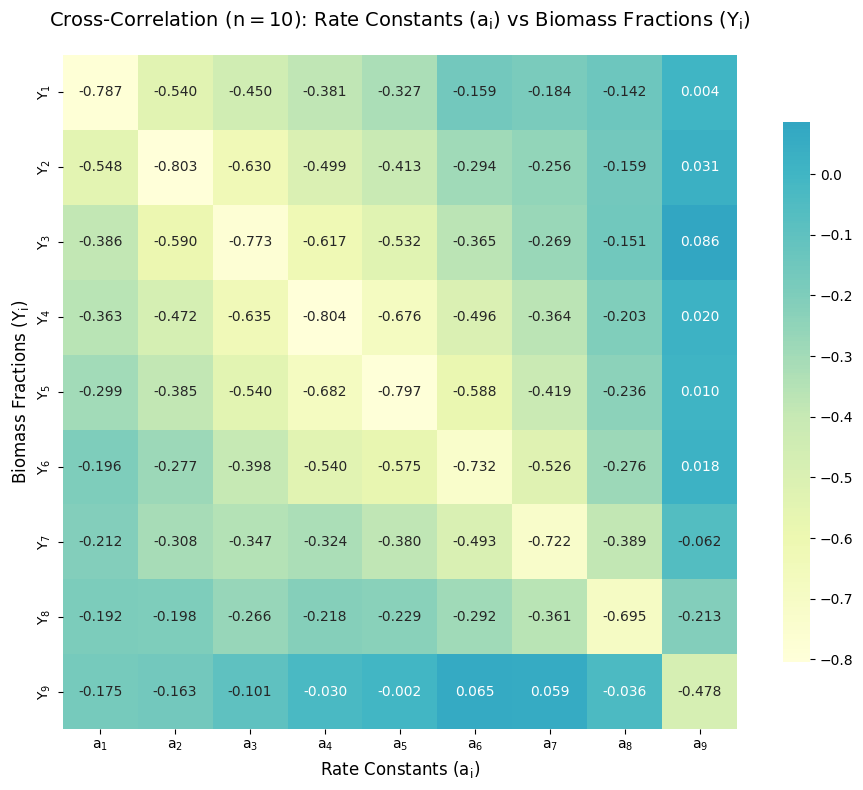

In [ ]:
correlation_matrix = df_corr.corr()   # Calculate correlation matrix

a_columns = [f'a_{i+1}' for i in range(9)]
Y_columns = [f'Y_{i+1}' for i in range(9)]
cross_corr = correlation_matrix.loc[Y_columns, a_columns]   # Extract cross-correlation

# Create properly formatted labels for the heatmap
a_labels = [f'$a_{{{i+1}}}$' for i in range(9)]
Y_labels = [f'$Y_{{{i+1}}}$' for i in range(9)]

plt.figure(figsize=(10, 8))
plt.rcParams['mathtext.default'] = 'regular'

sns.heatmap(cross_corr,
            annot=True,
            cmap="YlGnBu",
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={"shrink": .8},
            xticklabels=a_labels,
            yticklabels=Y_labels)

plt.title(r'Cross-Correlation ($n=10$): Rate Constants ($a_i$) vs Biomass Fractions ($Y_i$)', 
          fontsize=14, pad=20)
plt.xlabel(r'Rate Constants ($a_i$)', fontsize=12)
plt.ylabel(r'Biomass Fractions ($Y_i$)', fontsize=12)
plt.tight_layout()
plt.show()

## 2. Generalized System for Arbitrary Number of Partitions

Below is a **partial implementation** that demonstrates the concept.

C:\Users\huang\AppData\Local\Temp\ipykernel_20396\3750865014.py:99: DeprecationWarning: scipy.optimize: The `disp` and `iprint` options of the L-BFGS-B solver are deprecated and will be removed in SciPy 1.18.0.
  result = minimize(


Process completed in 7.88 seconds.


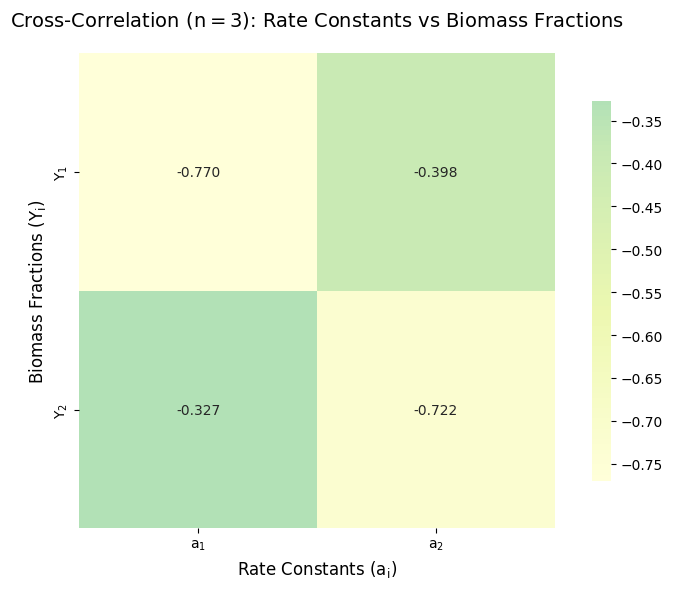

C:\Users\huang\AppData\Local\Temp\ipykernel_20396\3750865014.py:99: DeprecationWarning: scipy.optimize: The `disp` and `iprint` options of the L-BFGS-B solver are deprecated and will be removed in SciPy 1.18.0.
  result = minimize(


Process completed in 12.06 seconds.


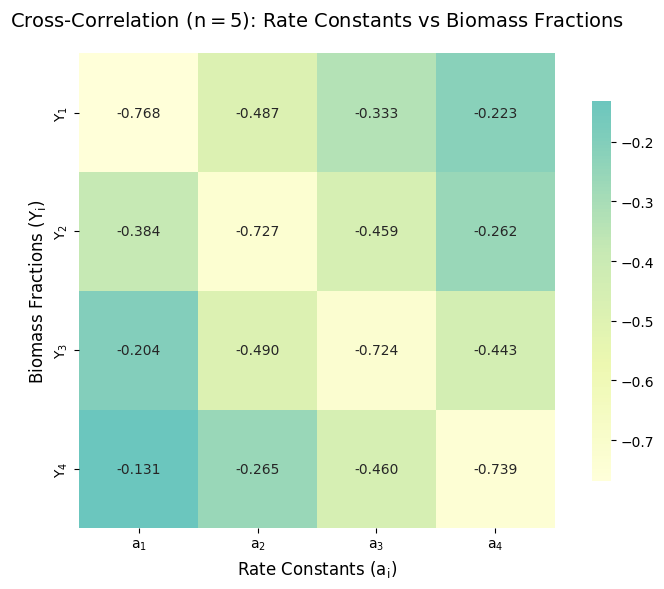

C:\Users\huang\AppData\Local\Temp\ipykernel_20396\3750865014.py:99: DeprecationWarning: scipy.optimize: The `disp` and `iprint` options of the L-BFGS-B solver are deprecated and will be removed in SciPy 1.18.0.
  result = minimize(


Process completed in 17.71 seconds.


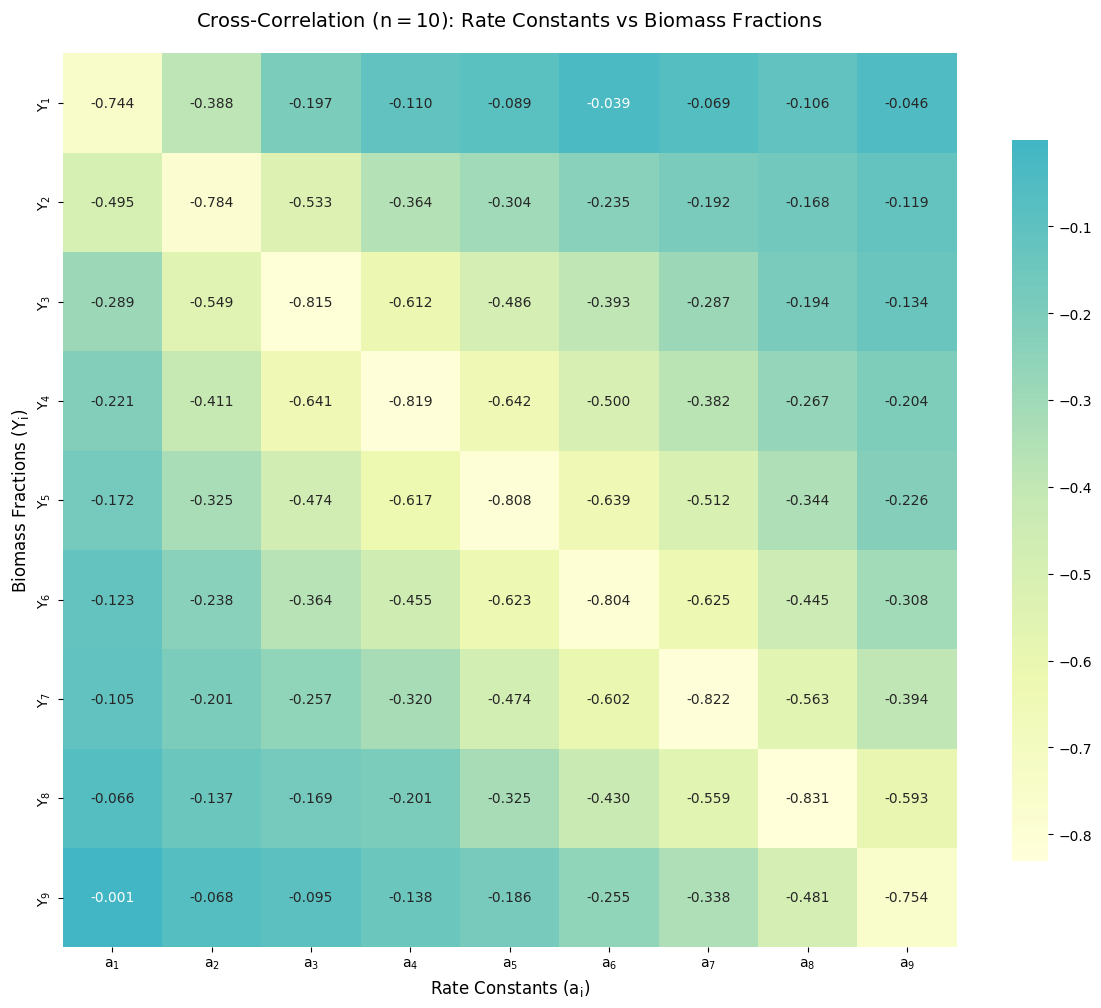

C:\Users\huang\AppData\Local\Temp\ipykernel_20396\3750865014.py:99: DeprecationWarning: scipy.optimize: The `disp` and `iprint` options of the L-BFGS-B solver are deprecated and will be removed in SciPy 1.18.0.
  result = minimize(


Process completed in 557.10 seconds.


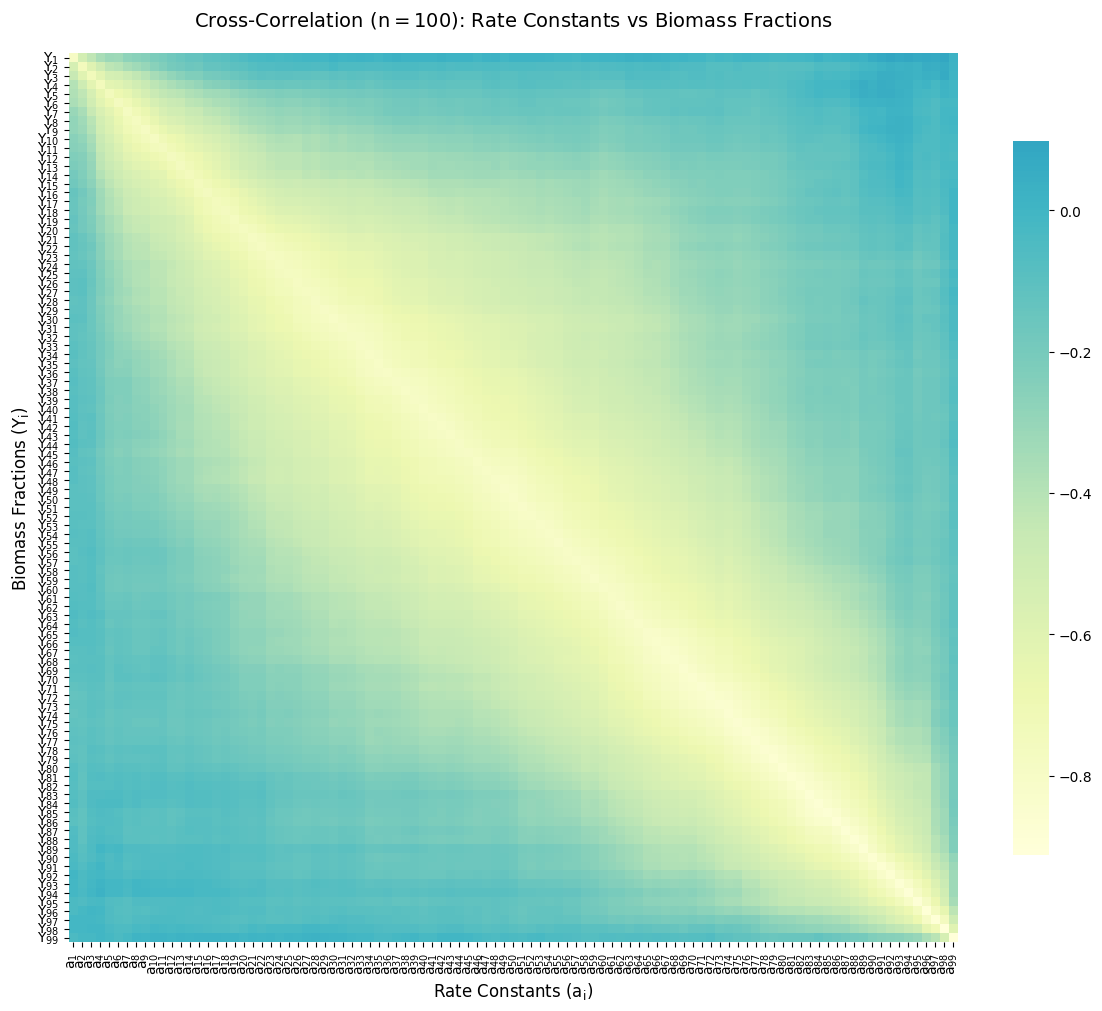

In [11]:
class PartitionSystemConfig:
    """Configuration class for different partition systems"""
    
    def __init__(self, n_partitions):
        self.n = n_partitions
        self.n_u_params = n_partitions - 1  # Number of u parameters
        self.n_rates = n_partitions - 1     # Number of rate constants
        
        # System-specific empirical parameters
        if n_partitions <= 5:
            self.param_bounds = (-5, 5)
            self.reg_strength = 1e-6
            self.a_range = (1, 30)
            self.k_range = (0.01, 0.1)
            self.maxiter = 3000
        else:  # Large systems
            self.param_bounds = (-3, 3)
            self.reg_strength = 1e-5
            self.a_range = (3, 25)
            self.k_range = (0.015, 0.06)
            self.maxiter = 3000

def softmax_partition_general(u, n_partitions):
    u_extended = np.append(u, 0.0)  # Add u_n = 0
    logZ = logsumexp(u_extended)
    theta = np.exp(u_extended - logZ)
    return theta

def BioSystemMM_general(theta, a_vals, k_vals, b_val, n_partitions):
    eps = 1e-12
    theta = np.maximum(theta, eps)
    n_rates = n_partitions - 1
    
    # Calculate Y1 through Y_{n-1}
    Y_vals = []
    Y_sum = 0
    
    for i in range(n_rates):
        term = (a_vals[i] * theta[i+1]) / (b_val * theta[0] + eps) + k_vals[i] - (1 - Y_sum)
        D = term**2 + 4 * (1 - Y_sum + eps) * k_vals[i]
        D = np.maximum(D, 0)
        
        if term >= 0:
            Y = 2 * (1 - Y_sum + eps) * k_vals[i] / (term + np.sqrt(D) + eps)
        else:
            Y = (np.sqrt(D) - term) / 2
        Y_vals.append(Y)
        Y_sum += Y
    
    # Y_n calculation (last compartment)
    last_idx = n_rates - 1
    denom = k_vals[last_idx] + Y_vals[last_idx] + eps
    Y_n = (a_vals[last_idx] * theta[n_rates] / (b_val + eps)) * (Y_vals[last_idx] / denom)
    Y_n = np.maximum(Y_n, eps)
    
    # Extended Y calculations
    Y_ext = [Y_n]
    for i in range(1, n_partitions):
        Y_i = (theta[i] / (theta[0] + eps)) * Y_n
        Y_i = np.maximum(Y_i, eps)
        Y_ext.append(Y_i)
    lambda_val = b_val * Y_n
    
    # structure: [b_val, theta_values, Y_values, Y_ext_values, lambda_val]
    result = [b_val] + list(theta) + Y_vals + Y_ext + [lambda_val]
    return np.array(result)

def create_correlation_analysis(n_partitions, n_samples=1000, b_sample=0.01, seed=42):
    config = PartitionSystemConfig(n_partitions)
    def objective_function(u, b_val, a_arr, k_arr):
        try:
            reg_penalty = config.reg_strength * np.sum(u**2)
            theta = softmax_partition_general(u, n_partitions)
            result = BioSystemMM_general(theta, a_arr, k_arr, b_val, n_partitions)
            
            # Lambda value is at the end of the result array
            obj_val = -result[-1] + reg_penalty
            
            if not np.isfinite(obj_val):
                return 1e6
            return obj_val
        except Exception as e:
            return 1e6
    
    def optimize_system(b_val, a_arr, k_arr):
        best_result = None
        best_obj = np.inf
        
        # Try multiple starting strategies
        for attempt in range(3):
            if attempt == 0:
                x0 = np.zeros(config.n_u_params)
            elif attempt == 1:
                x0 = np.random.normal(0, 0.1, config.n_u_params)
            else:
                x0 = np.random.uniform(-0.5, 0.5, config.n_u_params)
            
            try:
                result = minimize(
                    lambda u: objective_function(u, b_val, a_arr, k_arr),
                    x0=x0,
                    method='L-BFGS-B',
                    bounds=[config.param_bounds] * config.n_u_params,
                    options={
                        'maxiter': config.maxiter,
                        'disp': False
                    }
                )
                
                if result.success and result.fun < best_obj:
                    best_result = result
                    best_obj = result.fun
                    break
                    
            except Exception as e:
                continue
        
        if best_result is not None and best_result.success:
            theta = softmax_partition_general(best_result.x, n_partitions)
            return BioSystemMM_general(theta, a_arr, k_arr, b_val, n_partitions)
        return None
    
    # Generate samples
    np.random.seed(seed)
    all_a_values, all_Y_values = [], []
    
    start = time.time()
    
    for sample in range(n_samples):
        a_sample = np.random.uniform(*config.a_range, config.n_rates)
        k_sample = np.random.uniform(*config.k_range, config.n_rates)
        a_sample = np.sort(a_sample)[::-1]
        k_sample = np.sort(k_sample)[::-1]
        result_sample = optimize_system(b_sample, a_sample, k_sample)
        
        if result_sample is not None:
            # Extract Y values (they start after b_val and theta values)
            start_idx = 1 + n_partitions  # b_val + n_partitions theta values
            end_idx = start_idx + config.n_rates
            Y_sample = result_sample[start_idx:end_idx]
            all_a_values.append(a_sample)
            all_Y_values.append(Y_sample)

    print(f"Process completed in {time.time() - start:.2f} seconds.")
    
    # Create correlation analysis
    all_a_values = np.array(all_a_values)
    all_Y_values = np.array(all_Y_values)
    
    correlation_data = {}
    for i in range(config.n_rates):
        correlation_data[f'a_{i+1}'] = all_a_values[:, i]
    for i in range(config.n_rates):
        correlation_data[f'Y_{i+1}'] = all_Y_values[:, i]
    
    df_corr = pd.DataFrame(correlation_data)
    correlation_matrix = df_corr.corr()
    
    a_columns = [f'a_{i+1}' for i in range(config.n_rates)]
    Y_columns = [f'Y_{i+1}' for i in range(config.n_rates)]
    cross_corr = correlation_matrix.loc[Y_columns, a_columns]
    
    return cross_corr

def plot_correlation_heatmap(cross_corr, n_partitions, figsize=None):
    config = PartitionSystemConfig(n_partitions)
    
    if figsize is None:
        if n_partitions <= 5: figsize = (8, 6)
        else: figsize = (12, 10)
    
    # Create labels
    a_labels = [f'$a_{{{i+1}}}$' for i in range(config.n_rates)]
    Y_labels = [f'$Y_{{{i+1}}}$' for i in range(config.n_rates)]
    
    plt.figure(figsize=figsize)
    plt.rcParams['mathtext.default'] = 'regular'
    
    # Use different annotation strategies based on size
    show_annot = n_partitions <= 15
    annot_size = 8 if n_partitions > 10 else 10
    
    sns.heatmap(cross_corr,
                annot=show_annot,
                cmap="YlGnBu",
                center=0,
                square=True,
                fmt='.3f',
                cbar_kws={"shrink": .8},
                xticklabels=a_labels,
                yticklabels=Y_labels,
                annot_kws={'size': annot_size})
    
    plt.title(rf'Cross-Correlation ($n={n_partitions}$): Rate Constants vs Biomass Fractions', 
              fontsize=14, pad=20)
    plt.xlabel(r'Rate Constants ($a_i$)', fontsize=12)
    plt.ylabel(r'Biomass Fractions ($Y_i$)', fontsize=12)
    plt.tight_layout()
    plt.show()

# Test
for n in [3, 5, 10, 100]:
    cross_corr = create_correlation_analysis(n, n_samples=500)
    if cross_corr is not None:
        plot_correlation_heatmap(cross_corr, n)